<a href="https://colab.research.google.com/github/DensityDanil/tutorials/blob/main/3_%D0%91%D0%B0%D0%B7%D1%8B_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%B8_SQL_%D0%B7%D0%B0%D0%BF%D1%80%D0%BE%D1%81%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3.1 База данных «Тестирование», запросы на выборку

In [ ]:
#todo generate by picture
a=['student','attempt','testing',]
b=['subject','attempt','question']
c=['question','answer']

chapter_3_all_tables=['student','attempt','testing','subject','question','answer']


In [ ]:
def output_stepik_tables_as_variables(list_of_tables):
  for i in list_of_tables:
    print(f'''{i} = read_csv_spreadsheet("1CX-H9m9EP7N3hrrdBH7WTi_wWYCGUg9qHklgTo6CbPM",'{str(i)}') ''') #no need to connect to api since accesses by link

output_stepik_tables_as_variables(chapter_3_all_tables)

student = read_csv_spreadsheet("1CX-H9m9EP7N3hrrdBH7WTi_wWYCGUg9qHklgTo6CbPM",'student') 
attempt = read_csv_spreadsheet("1CX-H9m9EP7N3hrrdBH7WTi_wWYCGUg9qHklgTo6CbPM",'attempt') 
testing = read_csv_spreadsheet("1CX-H9m9EP7N3hrrdBH7WTi_wWYCGUg9qHklgTo6CbPM",'testing') 
subject = read_csv_spreadsheet("1CX-H9m9EP7N3hrrdBH7WTi_wWYCGUg9qHklgTo6CbPM",'subject') 
question = read_csv_spreadsheet("1CX-H9m9EP7N3hrrdBH7WTi_wWYCGUg9qHklgTo6CbPM",'question') 
answer = read_csv_spreadsheet("1CX-H9m9EP7N3hrrdBH7WTi_wWYCGUg9qHklgTo6CbPM",'answer') 

In [ ]:
generate_str_joins(chapter_3_all_tables)

from
	student as s
inner join
	attempt as a on s.student_id = a.attempt_id
inner join
	testing as t on a.attempt_id = t.testing_id
inner join
	subject as s on t.testing_id = s.subject_id
inner join
	question as q on s.subject_id = q.question_id
inner join
	answer as a on q.question_id = a.answer_id


##task2

In [ ]:
'''CREATE TABLE tableName 
(
    student_id	int,
    name_student	varchar(300)
)'''

'''INSERT INTO student (student_id,name_student)
VALUES
    ('1', 'Баранов Павел'),
    ('2', 'Абрамова Катя'),
    ('3', 'Семенов Иван'),
    ('4', 'Яковлева Галина')'''
    
    
'https://www.geeksforgeeks.org/python-sqlite-update-data/'

In [ ]:
task9_info = 'Вывести студентов, которые сдавали дисциплину «Основы баз данных», указать дату попытки и результат. Информацию вывести по убыванию результатов тестирования.'


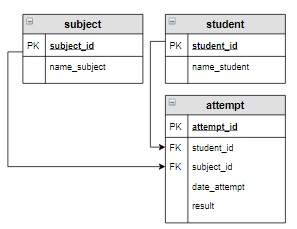

In [ ]:
tables = []

In [ ]:
sql='''
select 
s.student_id,count(distinct subject_id),count(attempt_id),count(distinct attempt_id)
from 
attempt a left join student s on s.student_id=a.student_id group by s.student_id
'''

In [ ]:
cop = '9 min'
sql = '''
select st.name_student, a.date_attempt,a.result 
from subject s
inner join attempt a on a.subject_id = s.subject_id
inner join student st on st.student_id=a.student_id
where name_subject='Основы баз данных'
order by a.result desc
'''
len(sql)
error_log = [
    ('#select * from attempt a left join student s on s.student_id=a.student_id group by s.student_id'),
    ('''ERROR 1055: Expression #1 of SELECT list is not in GROUP BY clause and contains nonaggregated column 'stepik_xJ6B0pYo.a.attempt_id' which is not functionally dependent on columns in GROUP BY clause; this is incompatible with sql_mode=only_full_group_by''')
]


##task3

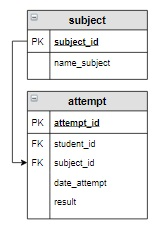

In [ ]:
sql=f'''select 
s.student_id,count(distinct a.subject_id),count(a.attempt_id),count(distinct attempt_id)
from 
attempt a left join student s on s.student_id=a.student_id 
group by a.subject_id'''
error_log += (sql,'''ERROR 1055: Expression #1 of SELECT list is not in GROUP BY clause and contains nonaggregated column 'stepik_bdTdGN6q.s.student_id' which is not functionally dependent on columns in GROUP BY clause; this is incompatible with sql_mode=only_full_group_by''')
            

In [ ]:
error_log

['#select * from attempt a left join student s on s.student_id=a.student_id group by s.student_id',
 "ERROR 1055: Expression #1 of SELECT list is not in GROUP BY clause and contains nonaggregated column 'stepik_xJ6B0pYo.a.attempt_id' which is not functionally dependent on columns in GROUP BY clause; this is incompatible with sql_mode=only_full_group_by",
 'select \ns.student_id,count(distinct a.subject_id),count(a.attempt_id),count(distinct attempt_id)\nfrom \nattempt a left join student s on s.student_id=a.student_id \ngroup by a.subject_id',
 "ERROR 1055: Expression #1 of SELECT list is not in GROUP BY clause and contains nonaggregated column 'stepik_bdTdGN6q.s.student_id' which is not functionally dependent on columns in GROUP BY clause; this is incompatible with sql_mode=only_full_group_by"]

In [ ]:
sql='''select 
a.student_id,su.name_subject,count(distinct a.attempt_id) as 'Количество',round(avg(result),2) as 'Среднее'
from 
attempt a
inner join subject su on a.subject_id = su.subject_id
group by a.subject_id,a.student_id
order by count(distinct a.attempt_id)
'''

In [ ]:
sql='''select 
#a.student_id,
su.name_subject,count(distinct a.attempt_id) as 'Количество',round(avg(a.result),2) as 'Среднее'
from 
attempt a
left join subject su on a.subject_id = su.subject_id
group by su.name_subject
order by count(distinct a.attempt_id) desc
'''

In [ ]:
sql='''select 
#a.student_id,
su.name_subject,count(distinct a.attempt_id) as 'Количество',round(avg(a.result),2) as 'Среднее'
from 
subject su
left join attempt a on a.subject_id = su.subject_id
group by su.name_subject
order by count(distinct a.attempt_id) desc'''

new_knowladge='to output null and calculate ave(attempts) right way  - use table where contain most at all values'
analyst_in_aviation_industry = ('https://stepik.org/users/130894892','https://t.me/Polichina')
cop = '10 min'

##task4

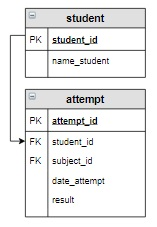

In [ ]:
task4_table_names = ['student','attempt']

In [ ]:
def output_stepik_tables_as_variables(list_of_tables):
  for i in list_of_tables:
    print(f'''{i} = read_csv_spreadsheet("1CX-H9m9EP7N3hrrdBH7WTi_wWYCGUg9qHklgTo6CbPM",'{str(i)}') ''') #no need to connect to api since accesses by link

output_stepik_tables_as_variables(task4_table_names)


student = read_csv_spreadsheet("1CX-H9m9EP7N3hrrdBH7WTi_wWYCGUg9qHklgTo6CbPM",'student') 
attempt = read_csv_spreadsheet("1CX-H9m9EP7N3hrrdBH7WTi_wWYCGUg9qHklgTo6CbPM",'attempt') 


In [ ]:
student = read_csv_spreadsheet("1CX-H9m9EP7N3hrrdBH7WTi_wWYCGUg9qHklgTo6CbPM",'student') 
attempt = read_csv_spreadsheet("1CX-H9m9EP7N3hrrdBH7WTi_wWYCGUg9qHklgTo6CbPM",'attempt') 

In [ ]:
describe = 'select * from student'
pds.sqldf(describe)

,student_id,name_student
0,1,Баранов Павел
1,2,Абрамова Катя
2,3,Семенов Иван
3,4,Яковлева Галина


In [ ]:
task4_info = 'Вывести студентов (различных студентов), имеющих максимальные результаты попыток . Информацию отсортировать в алфавитном порядке по фамилии студента.'

In [ ]:
#not to an end understand 'having max results of attemts'
#attempt finished with int amount of coorect answers per total amount

In [ ]:
sql1 ='''
select *
from student s

'''
pds.sqldf(sql1)

,student_id,name_student
0,1,Баранов Павел
1,2,Абрамова Катя
2,3,Семенов Иван
3,4,Яковлева Галина


In [ ]:
sql2 ='''
select *
from attempt a

'''
pds.sqldf(sql2)

,attempt_id,student_id,subject_id,date_attempt,result
0,1,1,2,2020-03-23,67
1,2,3,1,2020-03-23,100
2,3,4,2,2020-03-26,0
3,4,1,1,2020-04-15,33
4,5,3,1,2020-04-15,67
5,6,4,2,2020-04-21,100
6,7,3,1,2020-05-17,33


In [ ]:
sql3 ='''
select a.student_id,max(a.result),min(a.result),count(a.attempt_id),count(distinct subject_id)
from attempt a
group by a.student_id
order by count(a.attempt_id) desc
'''
pds.sqldf(sql3)

,student_id,max(a.result),min(a.result),count(a.attempt_id),count(distinct subject_id)
0,3,100,33,3,1
1,4,100,0,2,1
2,1,67,33,2,2


In [ ]:
sql4_max_result=f'''select max(result)
from attempt'''
pds.sqldf(sql4_max_result)

,max(result)
0,100


In [ ]:
sql5=f'''
select s.name_student, a.result
from attempt a
inner join student s on s.student_id = a.student_id
where a.result in
({sql4_max_result})
order by s.name_student asc
;
'''
pds.sqldf(sql5)

,name_student,result
0,Семенов Иван,100
1,Яковлева Галина,100


In [ ]:
sql6=f'''
select 
s.name_student, sum(a.result), count(a.attempt_id),group_concat(a.result)
from student s
left join attempt a on s.student_id = a.student_id
where a.result not in
({sql4_max_result})
group by s.name_student
order by s.name_student asc
;
'''
pds.sqldf(sql6)

,name_student,sum(a.result),count(a.attempt_id),group_concat(a.result)
0,Баранов Павел,100,2,"67,33"
1,Семенов Иван,100,2,"67,33"
2,Яковлева Галина,0,1,0


In [ ]:
sql7=f'''
select s.name_student, sum(a.result)
from student s
left join attempt a on s.student_id = a.student_id
where a.result not in
({sql4_max_result})
group by s.name_student
order by s.name_student asc
;
'''
pds.sqldf(sql7)

,name_student,sum(a.result)
0,Баранов Павел,100
1,Семенов Иван,100
2,Яковлева Галина,0


##task5. 
##en: If student make several attempts of one subject then calc difference between first and last attempt
##ru: Если студент совершал несколько попыток по одной и той же дисциплине, то вывести разницу в днях между первой и последней попыткой

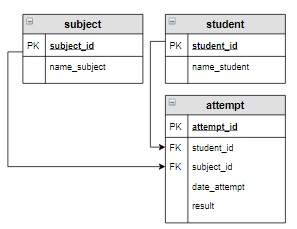

In [ ]:
task5_info='Если студент совершал несколько попыток по одной и той же дисциплине, то вывести разницу в днях между первой и последней попыткой. В результат включить фамилию и имя студента, название дисциплины и вычисляемый столбец Интервал. Информацию вывести по возрастанию разницы. Студентов, сделавших одну попытку по дисциплине, не учитывать. '

In [ ]:
task5_table_names = task4_table_names

NameError: ignored

In [ ]:
task5_table_names += ['subject']

In [ ]:
output_stepik_tables_as_variables(task5_table_names)

student = read_csv_spreadsheet("1CX-H9m9EP7N3hrrdBH7WTi_wWYCGUg9qHklgTo6CbPM",'student') 
attempt = read_csv_spreadsheet("1CX-H9m9EP7N3hrrdBH7WTi_wWYCGUg9qHklgTo6CbPM",'attempt') 
subject = read_csv_spreadsheet("1CX-H9m9EP7N3hrrdBH7WTi_wWYCGUg9qHklgTo6CbPM",'subject') 


In [ ]:
student = read_csv_spreadsheet("1CX-H9m9EP7N3hrrdBH7WTi_wWYCGUg9qHklgTo6CbPM",'student') 
attempt = read_csv_spreadsheet("1CX-H9m9EP7N3hrrdBH7WTi_wWYCGUg9qHklgTo6CbPM",'attempt') 
subject = read_csv_spreadsheet("1CX-H9m9EP7N3hrrdBH7WTi_wWYCGUg9qHklgTo6CbPM",'subject') 

In [ ]:
#what in subject table
sql='''
select * from subject
'''
pds.sqldf(sql)

,subject_id,name_subject
0,1,Основы SQL
1,2,Основы баз данных
2,3,Физика


In [ ]:
#group of subject and student
sql_samle='''
select student_id,subject_id
from attempt
group by student_id,subject_id
'''
pds.sqldf(sql_samle)

,student_id,subject_id
0,1,1
1,1,2
2,3,1
3,4,2


In [ ]:
#group of subject 
sql_one_student_with_many_subjects='''
select student_id,subject_id
from attempt
group by student_id,subject_id
having count(student_id)=1
'''
pds.sqldf(sql_one_student_with_many_subjects)

,student_id,subject_id
0,1,1
1,1,2


In [ ]:
#group of subject 
sql_to_except='''
select student_id,subject_id,group_concat(date_attempt)
from attempt
group by student_id,subject_id
having count(attempt_id)=1
'''
pds.sqldf(sql_to_except)

,student_id,subject_id,group_concat(date_attempt)
0,1,1,2020-04-15
1,1,2,2020-03-23


In [ ]:
#group of subject 
sql_more_then_one_student_attempt='''
select student_id,subject_id,group_concat(date_attempt),
-- max(date_attempt),min(date_attempt), 
julianday(max(date_attempt))- julianday(min(date_attempt) )
from attempt
group by student_id,subject_id
having count(attempt_id)>1
'''
#lead func
sql_more_then_one_student_attempt_df = pds.sqldf(sql_more_then_one_student_attempt)
sql_more_then_one_student_attempt_df

,student_id,subject_id,group_concat(date_attempt),julianday(max(date_attempt))- julianday(min(date_attempt) )
0,3,1,"2020-03-23,2020-04-15,2020-05-17",55.0
1,4,2,"2020-03-26,2020-04-21",26.0


In [ ]:
#group of subject 
sql_more_then_one_student_attempt='''
select 
  student_id,subject_id,group_concat(date_attempt),
 max(date_attempt),min(date_attempt), 
julianday(max(date_attempt))- julianday((date_attempt) )
from attempt
group by student_id,subject_id
having count(attempt_id)>1
'''
#lead func
sql_more_then_one_student_attempt_df = pds.sqldf(sql_more_then_one_student_attempt)
sql_more_then_one_student_attempt_df

,student_id,subject_id,group_concat(date_attempt),max(date_attempt),min(date_attempt),julianday(max(date_attempt))- julianday((date_attempt) )
0,3,1,"2020-03-23,2020-04-15,2020-05-17",2020-05-17,2020-03-23,55.0
1,4,2,"2020-03-26,2020-04-21",2020-04-21,2020-03-26,26.0


In [ ]:
mysql_answer='''select 
  st.name_student,sb.name_subject,
  #,group_concat(date_attempt),
  datediff(max(a.date_attempt),min(a.date_attempt)) as 'Интервал'
from attempt a 
inner join student st on st.student_id = a.student_id
inner join subject sb on sb.subject_id = a.subject_id
group by a.student_id,a.subject_id
having count(attempt_id)>1
order by Интервал asc'''
#correct

In [ ]:
to_lead = sql_more_then_one_student_attempt_df['group_concat(date_attempt)'][0]
to_lead

'2020-03-23,2020-04-15,2020-05-17'

In [ ]:
for i in to_lead.split(','):
  print(i)

2020-03-23
2020-04-15
2020-05-17


In [ ]:
#date difference in attempts
sql='''
select student_id,subject_id
from attempt
group by student_id,subject_id
'''
pds.sqldf(sql)

##task6

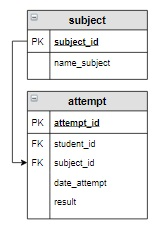

In [ ]:
task_6_info = 'Студенты могут тестироваться по одной или нескольким дисциплинам (не обязательно по всем). Вывести дисциплину и количество уникальных студентов (столбец назвать Количество), которые по ней проходили тестирование . Информацию отсортировать сначала по убыванию количества, а потом по названию дисциплины. В результат включить и дисциплины, тестирование по которым студенты не проходили, в этом случае указать количество студентов 0.'

In [ ]:
len(task_6_info)

430

In [ ]:
len('Студенты могут тестироваться по одной')

37

In [ ]:
def text_line_by_line(str,characters_per_line):
  start=0
  step=characters_per_line
  for i in range(len(str)):
    if i!=str[-1]:
      print(str[start:step])
      start+=characters_per_line
      step+=characters_per_line
    else:
      break
notice_while_not_last_element=' if i!=task_6_info[-1]: not working exactly how i excpect'
text_line_by_line(task_6_info,37)

In [ ]:
def print_table(lines, col_num, col_width):
    for line_ix in range(0, len(lines), col_num):
        print (' -- '.join([line.strip().ljust(col_width) for line in lines[line_ix:line_ix+col_num]]))

print_table_link = 'https://stackoverflow.com/questions/9318635/how-do-i-format-text-from-a-file-in-python'

In [ ]:
'put text in back borders python'

In [ ]:
sql=f'''select subject_id,count(distinct student_id) from 
attempt
group by subject_id'''
pds.sqldf(sql)

,subject_id,count(distinct student_id)
0,1,2
1,2,2


In [ ]:
sql=f'''
select 
  sb.name_subject,count(distinct a.student_id)  as  'Количество'
from 
  subject sb
left join 
  attempt a on sb.subject_id = a.subject_id
group by 
  sb.name_subject-- if a.subject_id then error
order by  Количество desc, sb.name_subject asc'''
len(sql)
pds.sqldf(sql)

,name_subject,Количество
0,Основы SQL,2
1,Основы баз данных,2
2,Физика,0


In [ ]:
len(sql)

251

In [ ]:
sql=f'''
s1
  sb.name_subject,count(distinct a.student_id)  as  'Количество'
f4 
  subject sb
lj5
  attempt a on sb.subject_id = a.subject_id
gb12 
  sb.name_subject -- if a.subject_id then error
ob22  Количество desc, sb.name_subject asc'''

len(sql)
lowercase_sql_clause_aliases_to_sql(sql)
pds.sqldf(lowercase_sql_clause_aliases_to_sql(sql))


,name_subject,Количество
0,Основы SQL,2
1,Основы баз данных,2
2,Физика,0


In [ ]:
len(sql)

229

##task7

In [ ]:
task4_table_names

['student', 'attempt', 'question']

In [ ]:
task5_table_names = task4_table_names
task5_table_names+=['question']

In [ ]:
output_stepik_tables_as_variables_by_sheet_name(task5_table_names)

student = read_csv_spreadsheet("1CX-H9m9EP7N3hrrdBH7WTi_wWYCGUg9qHklgTo6CbPM",'student') 
attempt = read_csv_spreadsheet("1CX-H9m9EP7N3hrrdBH7WTi_wWYCGUg9qHklgTo6CbPM",'attempt') 
question = read_csv_spreadsheet("1CX-H9m9EP7N3hrrdBH7WTi_wWYCGUg9qHklgTo6CbPM",'question') 


In [ ]:
question = read_csv_spreadsheet("1CX-H9m9EP7N3hrrdBH7WTi_wWYCGUg9qHklgTo6CbPM",'question') 

In [ ]:
sql=f'''
select 
  *
from 
  question
-- ORDER BY RAND()'''
pds.sqldf(sql)

,question_id,name_question,subject_id
0,1,Запрос на выборку начинается с ключевого слова:,1
1,2,"Условие, по которому отбираются записи, задает...",1
2,3,Для сортировки используется:,1
3,4,Какой запрос выбирает все записи из таблицы st...,1
4,5,Для внутреннего соединения таблиц используется...,1
5,6,База данных - это:,2
6,7,Отношение - это:,2
7,8,Концептуальная модель используется для,2
8,9,Какой тип данных не допустим в реляционной таб...,2


In [ ]:
sql='''select qt.question_id,qt.name_question  
from question qt
inner join subject sb on sb.subject_id=qt.subject_id
where qt.subject_id=2
ORDER BY RAND() limit 3
'''

##task8

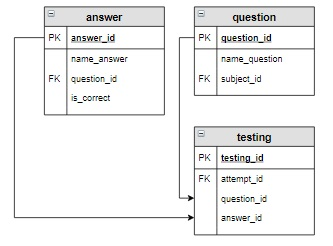

In [ ]:
task8_info='Вывести вопросы, которые были включены в тест для Семенова Ивана по дисциплине «Основы SQL» 2020-05-17  (значение attempt_id для этой попытки равно 7). Указать, какой ответ дал студент и правильный он или нет (вывести Верно или Неверно). В результат включить вопрос, ответ и вычисляемый столбец  Результат.'


In [ ]:
sql='''select  
 qt.name_question, at.name_answer,if(at.is_correct=1,'Верно','Неверно') as Результат 
from 
  answer at 
inner join testing tg on tg.answer_id=at.answer_id
inner join question qt on qt.question_id=tg.question_id
inner join subject st on st.subject_id=qt.subject_id
where 
  tg.attempt_id=7 and qt.subject_id=1
'''

In [ ]:
# Merge multiple dataframes
multiple_mrege_link='https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns'
df1 = pd.DataFrame(np.array([
    ['a', 5, 9],
    ['b', 4, 61],
    ['c', 24, 9]]),
    columns=['name', 'attr11', 'attr12'])
df2 = pd.DataFrame(np.array([
    ['a', 5, 19],
    ['b', 14, 16],
    ['c', 4, 9]]),
    columns=['name', 'attr21', 'attr22'])
df3 = pd.DataFrame(np.array([
    ['a', 15, 49],
    ['b', 4, 36],
    ['c', 14, 9]]),
    columns=['name', 'attr31', 'attr32'])


In [ ]:
pd.merge(pd.merge(df1,df2,on='name'),df3,on='name')

,name,attr11,attr12,attr21,attr22,attr31,attr32
0,a,5,9,5,19,15,49
1,b,4,61,14,16,4,36
2,c,24,9,4,9,14,9


In [ ]:
dfs = [df1, df2, df3]
dfs = [df.set_index('name') for df in dfs]

dfs[0].join(dfs[1:])

,attr11,attr12,attr21,attr22,attr31,attr32
name,,,,,,
a,5,9,5,19,15,49
b,4,61,14,16,4,36
c,24,9,4,9,14,9


In [ ]:
df1 = pd.DataFrame(np.array([
    ['a', 5, 9],
    ['b', 4, 61],
    ['c', 24, 9]]),
    columns=['1', 'attr11', 'attr12'])
df2 = pd.DataFrame(np.array([
    ['a', 5, 19],
    ['b', 14, 16],
    ['c', 4, 9]]),
    columns=['2', 'attr21', 'attr22'])
df3 = pd.DataFrame(np.array([
    ['a', 15, 49],
    ['b', 4, 36],
    ['c', 14, 9]]),
    columns=['3', 'attr31', 'attr32'])

dfs = [df1, df2, df3]
i1='1'
i2='2'
i3='3'
dfs_indexes=[i1,i2,i3]

for i in dfs_indexes:
  dfs = [df.set_index(str(i)) for df in dfs]
  dfs[0].join(dfs[1:])

dfs


[   1 attr11 attr12
 0  a      5      9
 1  b      4     61
 2  c     24      9,    2 attr21 attr22
 0  a      5     19
 1  b     14     16
 2  c      4      9,    3 attr31 attr32
 0  a     15     49
 1  b      4     36
 2  c     14      9]

##task9

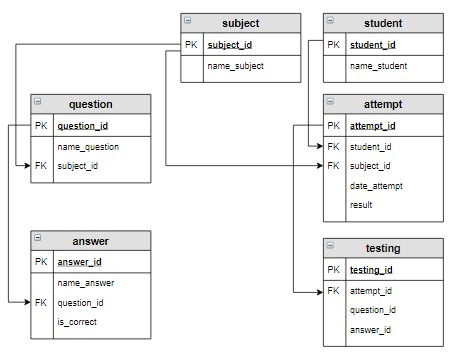#

In [ ]:
task5_table_names

NameError: ignored

In [ ]:
sql = '''select at.student_id,sc.subject_id,count(distinct tg.attempt_id)
from attempt at
left join testing tg on tg.attempt_id=at.attempt_id
left join subject sc on sc.subject_id = at.subject_id
left join question qn on qn.subject_id = sc.subject_id
left join answer ar on ar.question_id=qn.question_id
group by at.student_id,sc.subject_id'''

In [ ]:


sentence_by_sentence_with_new_line('Посчитать результаты тестирования. Результат попытки вычислить как количество правильных ответов, деленное на 3 (количество вопросов в каждой попытке) и умноженное на 100. Результат округлить до двух знаков после запятой. Вывести фамилию студента, название предмета, дату и результат. Последний столбец назвать Результат. Информацию отсортировать сначала по фамилии студента, потом по убыванию даты попытки.')


(['Посчитать результаты тестирования',
  'Результат попытки вычислить как количество правильных ответов, деленное на 3 (количество вопросов в каждой попытке) и умноженное на 100',
  'Результат округлить до двух знаков после запятой',
  'Вывести фамилию студента, название предмета, дату и результат',
  'Последний столбец назвать Результат',
  'Информацию отсортировать сначала по фамилии студента, потом по убыванию даты попытки.'],
 6)

In [ ]:
#on this step i can define needed in task columns - don't lose them

sql1=f'''select s.name_student,st.name_subject,a.attempt_id,ar.is_correct,q.question_id,a.date_attempt
from
	student as s
left join
	attempt as a on s.student_id = a.student_id
left join
	testing as t on a.attempt_id = t.attempt_id
left join
	question as q on t.question_id = q.question_id
left join
	subject as st on a.subject_id = st.subject_id
left join
	answer as ar on q.question_id = ar.answer_id

'''
sql1_df = pds.sqldf(sql1,locals())
sql1_df
#if baranov got 1 point by 1 attempt for 1 question then 
#1 attempt_id = 1 date_attempt

,name_student,name_subject,attempt_id,is_correct,question_id,date_attempt
0,Баранов Павел,Основы баз данных,1.0,1.0,6.0,2020-03-23
1,Баранов Павел,Основы баз данных,1.0,0.0,7.0,2020-03-23
2,Баранов Павел,Основы баз данных,1.0,1.0,9.0,2020-03-23
3,Баранов Павел,Основы SQL,4.0,0.0,1.0,2020-04-15
4,Баранов Павел,Основы SQL,4.0,0.0,3.0,2020-04-15
5,Баранов Павел,Основы SQL,4.0,0.0,5.0,2020-04-15
6,Абрамова Катя,None,NaN,NaN,NaN,None
7,Семенов Иван,Основы SQL,2.0,0.0,1.0,2020-03-23
8,Семенов Иван,Основы SQL,2.0,0.0,3.0,2020-03-23
9,Семенов Иван,Основы SQL,2.0,0.0,4.0,2020-03-23


In [ ]:
for i in sql1_df.columns:
  print(f'count (q4.{i}) as all_amount_{i},')

count (q4.name_student) as all_amount_name_student,
count (q4.name_subject) as all_amount_name_subject,
count (q4.attempt_id) as all_amount_attempt_id,
count (q4.is_correct) as all_amount_is_correct,
count (q4.question_id) as all_amount_question_id,
count (q4.date_attempt) as all_amount_date_attempt,


In [ ]:
sql=f'''
select 
  q4.name_student,
  count(q4.name_student),
  sum(q4.is_correct),
  count(distinct name_subject) as unique_subject,
  count(distinct q4.attempt_id) as unique_attempt_id,
  count(distinct q4.question_id) as unique_question_id
from 
  ({sql1}) as q4
group by 
  q4.name_student
'''
pds.sqldf(sql,locals())

,name_student,count(q4.name_student),sum(q4.is_correct),unique_subject,unique_attempt_id,unique_question_id
0,Абрамова Катя,1,NaN,0,0,0
1,Баранов Павел,6,2.0,2,2,6
2,Семенов Иван,9,1.0,1,3,5
3,Яковлева Галина,6,3.0,1,2,4


In [ ]:
sql2 = f'''
select 
q1.name_student,q1.name_subject,question_id,count(distinct q1.attempt_id) as unique_tries,q1.is_correct -- count(distinct q1.attempt_id)-count(q1.attempt_id) ->0
from ({sql1}) as q1 
group by q1.question_id,q1.name_student,q1.name_subject
order by q1.name_student,unique_tries desc'''
pds.sqldf(sql2,locals())

,name_student,name_subject,question_id,unique_tries,is_correct
0,Абрамова Катя,None,NaN,0,NaN
1,Баранов Павел,Основы SQL,1.0,1,0.0
2,Баранов Павел,Основы SQL,3.0,1,0.0
3,Баранов Павел,Основы SQL,5.0,1,0.0
4,Баранов Павел,Основы баз данных,6.0,1,1.0
5,Баранов Павел,Основы баз данных,7.0,1,0.0
6,Баранов Павел,Основы баз данных,9.0,1,1.0
7,Семенов Иван,Основы SQL,1.0,3,0.0
8,Семенов Иван,Основы SQL,4.0,3,0.0
9,Семенов Иван,Основы SQL,2.0,1,1.0


In [ ]:
sql3=f'''select q3.name_student,q3.name_subject, sum(q3.is_correct)/q3.unique_tries
from ({sql2}) as q3
group by q3.name_student,q3.name_subject
'''
pds.sqldf(sql3,locals())

,name_student,name_subject,sum(q3.is_correct)/q3.unique_tries
0,Абрамова Катя,None,NaN
1,Баранов Павел,Основы SQL,0.0
2,Баранов Павел,Основы баз данных,2.0
3,Семенов Иван,Основы SQL,1.0
4,Яковлева Галина,Основы баз данных,2.0


In [ ]:
sql=f'''select 
s.name_student,st.name_subject,
a.attempt_id,q.question_id,
sum(ar.is_correct),count(q.question_id),
count(distinct a.attempt_id) 
-- round( (sum(ar.is_correct),count(q.question_id) ) *100,2) as Результат1
from
	student as s
left join
	attempt as a on s.student_id = a.student_id
left join
	testing as t on a.attempt_id = t.attempt_id
left join
	question as q on t.question_id = q.question_id
left join
	subject as st on a.subject_id = st.subject_id
left join
	answer as ar on q.question_id = ar.answer_id

group by s.name_student,st.name_subject
order by s.name_student asc,a.date_attempt desc

'''
pds.sqldf(sql,locals())

,name_student,name_subject,attempt_id,question_id,sum(ar.is_correct),count(q.question_id),count(distinct a.attempt_id)
0,Абрамова Катя,None,NaN,NaN,NaN,0,0
1,Баранов Павел,Основы SQL,4.0,5.0,0.0,3,1
2,Баранов Павел,Основы баз данных,1.0,9.0,2.0,3,1
3,Семенов Иван,Основы SQL,7.0,5.0,1.0,9,3
4,Яковлева Галина,Основы баз данных,6.0,8.0,3.0,6,2


In [ ]:
sql='''select 
s.name_student,st.name_subject,a.date_attempt,
round( (sum(ar.is_correct)/count(distinct q.question_id) )*100.0,2) as Результат -- round( ((sum(ar.is_correct)*1.0)/(count(distinct q.question_id)*1.0)) )*100.0,2) as Результат
from
	student as s
left join
	attempt as a on s.student_id = a.student_id
left join
	testing as t on a.attempt_id = t.attempt_id
left join
	question as q on t.question_id = q.question_id
left join
	subject as st on a.subject_id = st.subject_id
left join
	answer as ar on q.answer_id = ar.answer_id -- not correct
group by s.name_student,st.name_subject,a.date_attempt
order by s.name_student asc,a.date_attempt desc'''
pds.sqldf(sql,locals())

NameError: ignored

##task10

In [ ]:
task1_info = '''
Автор - Лариса Фернандес
Найти вопрос, с самой большой успешностью выполнения - "самый легкий" и вопрос, с самой маленькой успешностью выполнения - "самый сложный".  
(Подробно про успешность на этом шаге). Вывести предмет, эти два вопроса и указание - самый сложный или самый легкий это вопрос. 
Сначала вывести самый легкий запроса, потом самый сложный.'''


In [ ]:
tables_group_1 = ['subject','question','answer'] #,'science matter']
tables_group_2 = ['student','attempt','testing']

In [ ]:
for table in tables_group_2:
  read_csv_spreadsheet("1CX-H9m9EP7N3hrrdBH7WTi_wWYCGUg9qHklgTo6CbPM",str(table))

In [ ]:
connections = ''
for i,j in zip(tables[0:1:],tables[1:2:]):
  print(f'from\n\t{i} as {i[0]}\ninner join\n\t{j} as {j[0]} on {i[0]}.{i}_id = {j[0]}.{j}_id')

for i,j in zip(tables[1::],tables[2::]):
  print(f'inner join\n\t{j} as {j[0]} on {i[0]}.{i}_id = {j[0]}.{j}_id')

NameError: ignored

In [ ]:
# put your python code here
def sum():
    a=[]
    a += input().split(' ')
    sum_in_list=0
    for i in a:
        sum_in_list+=int(i)    
    return sum_in_list


sum()


8 11


19

#3.2 База данных «Тестирование», запросы корректировки

In [ ]:
sql='''insert into attempt (attempt_id,student_id,subject_id,date_attempt,result)
select 8,student_id,subject_id,now(),Null -- )0!=Null by Null we can define if attempt has been made if 0 then it no result 
from attempt
where student_id = 1
and subject_id = 2;
select * from attempt
'''


In [ ]:
#Viktor Osadchiy https://stepik.org/users/353750822
#Здесь можно без JOIN сделать, указав нужные поля через SELECT:

def insert_new_attempt_by_student_and_course_name(name,course_name):
  insert_sql=f'''INSERT INTO attempt (_, _, _, _)
  SELECT
          (SELECT student_id FROM student WHERE name_student LIKE '{name}%'),
          (SELECT subject_id FROM subject WHERE name_subject LIKE '{course_name}%'),
          NOW(),
          NULL;'''
  pds.sqldf(insert_sql,locals())
  return pds.sqldf('''SELECT * FROM attempt''',locals())


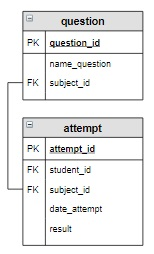

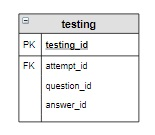

In [ ]:
sql='''select name_question 
from  qn
inner join attempt at on at.subject_id = qn.subject_id
order by RAND() limit 3
'''

In [ ]:
f'''select student_id, max(date_attempt), max(attempt_id),group_concat(attempt_id)
from attempt at
inner join question qn on at.subject_id = qn.subject_id
group by student_id
;'''

In [ ]:
f'''select name_question 
from question qn
left join attempt at on at.subject_id = qn.subject_id
where attempt_id in (
select max(attempt_id)
from attempt at
inner join question qn on at.subject_id = qn.subject_id
group by student_id
)
order by RAND() limit 3;'''

In [ ]:
#Не используйте явно номер попытки 8
'''#select * from testing;
insert into testing(question_id,attempt_id)
select question_id,8 as attempt_id #at.attempt_id+1 
from question qn
left join attempt at on at.subject_id = qn.subject_id
where attempt_id in (
select max(attempt_id)
from attempt at
inner join question qn on at.subject_id = qn.subject_id
group by student_id
)
order by RAND() limit 3;
#select * from testing;'''
#increase max attemp_id to 1
#good idea to have knowlage of how to insert data - cause it can be usefull in my own dairy and understand logic of data management


In [ ]:
#  Результат попытки вычислить как количество правильных ответов, деленное на 3 (количество вопросов в каждой попытке) и умноженное на 100.
#sum(is_correct)/count(question_id)
#seems neede to group by student but there is no field in two tables to do it

f'''select tg.testing_id,tg.attempt_id,ar.question_id,ar.is_correct
from answer ar
left join testing tg on tg.answer_id = ar.answer_id and tg.question_id = ar.question_id 
where tg.attempt_id = 8 '''

In [ ]:
#total right answers by attempt
'''select sum(ar.is_correct)/3
from answer ar
left join testing tg on tg.answer_id = ar.answer_id and tg.question_id = ar.question_id 
where tg.attempt_id = 8
group by tg.attempt_id
;'''

In [ ]:
f'''update attempt
set result = 
(
select round( (sum(ar.is_correct) /3)*100) as result 
from answer ar
left join testing tg on tg.answer_id = ar.answer_id and tg.question_id = ar.question_id 
where tg.attempt_id = 8
group by tg.attempt_id)
where attempt_id = 8
;'''

In [ ]:
#Александр Вергун

f'''UPDATE attempt a
SET result = (
    SELECT round(SUM(is_correct) / 3 * 100)
    FROM testing JOIN answer USING (answer_id) 
    WHERE attempt_id = a.attempt_id
    GROUP By attempt_id
)
WHERE a.attempt_id = 8;

SELECT * FROM attempt;'''

In [ ]:
#Yury Popov
max_attepmt='''SELECT MAX(attempt_id) FROM attempt
'''
f'''UPDATE attempt
SET result = (
    SELECT round((SUM(is_correct) / 3 ) * 100) 
    FROM answer JOIN testing
    ON answer.answer_id = testing.answer_id
        JOIN question
        ON question.question_id = testing.question_id
    WHERE attempt_id = (
        SELECT attempt_id
        FROM ({max_attepmt}) query1
        )
    )
WHERE attempt_id = (
        SELECT *
        FROM ({max_attepmt}) query1
        );

SELECT * FROM attempt;'''

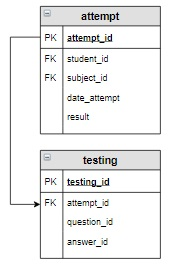

In [ ]:
'''CREATE TABLE testing (
    testing_id INT PRIMARY KEY AUTO_INCREMENT, 
    attempt_id INT, 
    question_id INT, 
    answer_id INT,
    FOREIGN KEY (attempt_id)  REFERENCES attempt (attempt_id) ON DELETE CASCADE
);'''

In [ ]:
sql='''select * from attempt;
select * from testing;
delete from attempt where date_attempt<'2020-05-01';
select * from attempt;
select * from testing;
'''

#3.3 База данных «Абитуриент», запросы на выборку

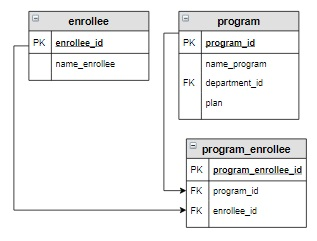

##create db

In [ ]:
#Алексей Федоренко
sql=''''START TRANSACTION ;
DROP TABLE IF EXISTS enrollee_subject;
DROP TABLE IF EXISTS program_enrollee;
DROP TABLE IF EXISTS program_subject;
DROP TABLE IF EXISTS enrollee_achievement;
DROP TABLE IF EXISTS achievement;
DROP TABLE IF EXISTS enrollee;
DROP TABLE IF EXISTS program;
DROP TABLE IF EXISTS subject;
DROP TABLE IF EXISTS department;
COMMIT ;
START TRANSACTION ;
CREATE TABLE department (
    `department_id` INT PRIMARY KEY AUTO_INCREMENT,
    `name_department` VARCHAR(30)
);
INSERT INTO department (`department_id`, `name_department`)
VALUES (1, 'Инженерная школа'), (2, 'Школа естественных наук');

CREATE TABLE subject (
    `subject_id` INT PRIMARY KEY AUTO_INCREMENT,
    `name_subject` VARCHAR(30)
);
INSERT INTO subject (`subject_id`, `name_subject`)
VALUES (1, 'Русский язык'), (2, 'Математика'), (3, 'Физика'), (4, 'Информатика');

CREATE TABLE program (
    `program_id` INT PRIMARY KEY AUTO_INCREMENT,
    `name_program` VARCHAR(50),
    `department_id` INT,
    `plan` INT,
    FOREIGN KEY (`department_id`) REFERENCES `department`(`department_id`) ON DELETE CASCADE
);
INSERT INTO program (`program_id`, `name_program`, `department_id`, `plan`)
VALUES (1, 'Прикладная математика и информатика', 2, 2),
(2, 'Математика и компьютерные науки', 2, 1),
(3, 'Прикладная механика', 1, 2),
(4, 'Мехатроника и робототехника', 1, 3);

CREATE TABLE enrollee (
    `enrollee_id` INT PRIMARY KEY AUTO_INCREMENT,
    `name_enrollee` VARCHAR(50)
);
INSERT INTO enrollee (`enrollee_id`, `name_enrollee`)
VALUES (1, 'Баранов Павел'), (2, 'Абрамова Катя'), (3, 'Семенов Иван'),
(4, 'Яковлева Галина'), (5, 'Попов Илья'), (6, 'Степанова Дарья');

CREATE TABLE achievement (
    `achievement_id` INT PRIMARY KEY AUTO_INCREMENT,
    `name_achievement` VARCHAR(30),
    `bonus` INT
);
INSERT INTO achievement (`achievement_id`, `name_achievement`, `bonus`)
VALUES (1, 'Золотая медаль', 5), (2, 'Серебряная медаль', 3),
    (3, 'Золотой значок ГТО', 3),(4, 'Серебряный значок ГТО', 1);

CREATE TABLE enrollee_achievement (
    `enrollee_achiev_id` INT PRIMARY KEY AUTO_INCREMENT,
    `enrollee_id` INT,
    `achievement_id` INT,
    FOREIGN KEY (`enrollee_id`) REFERENCES `enrollee`(`enrollee_id`) ON DELETE CASCADE,
    FOREIGN KEY (`achievement_id`) REFERENCES `achievement`(`achievement_id`) ON DELETE CASCADE
);
INSERT INTO enrollee_achievement (`enrollee_achiev_id`, `enrollee_id`, `achievement_id`)
VALUES (1, 1, 2), (2, 1, 3), (3, 3, 1), (4, 4, 4), (5, 5, 1),(6, 5, 3);

CREATE TABLE program_subject (
    `program_subject_id` INT PRIMARY KEY AUTO_INCREMENT,
    `program_id` INT,
    `subject_id` INT,
    `min_result` INT,
    FOREIGN KEY (`program_id`) REFERENCES `program`(`program_id`)  ON DELETE CASCADE,
    FOREIGN KEY (`subject_id`) REFERENCES `subject`(`subject_id`) ON DELETE CASCADE
);
INSERT INTO program_subject (`program_subject_id`, `program_id`, `subject_id`, `min_result`)
VALUES (1, 1, 1, 40),(2, 1, 2, 50), (3, 1, 4, 60), (4, 2, 1, 30),
       (5, 2, 2, 50),(6, 2, 4, 60), (7, 3, 1, 30),(8, 3, 2, 45),
       (9, 3, 3, 45),(10, 4, 1, 40), (11, 4, 2, 45), (12, 4, 3, 45);

CREATE TABLE program_enrollee (
    `program_enrollee_id` INT PRIMARY KEY AUTO_INCREMENT,
    `program_id` INT,
    `enrollee_id` INT,
    FOREIGN KEY (`program_id`) REFERENCES `program`(`program_id`) ON DELETE CASCADE,
    FOREIGN KEY (`enrollee_id`) REFERENCES enrollee(`enrollee_id`) ON DELETE CASCADE
);
INSERT INTO program_enrollee (`program_enrollee_id`, `program_id`, `enrollee_id`)
VALUES (1, 3, 1), (2, 4, 1), (3, 1, 1), (4, 2, 2), (5, 1, 2),
       (6, 1, 3), (7, 2, 3), (8, 4, 3), (9, 3, 4), (10, 3, 5),
       (11, 4, 5), (12, 2, 6), (13, 3, 6), (14, 4, 6);

CREATE TABLE enrollee_subject (
    `enrollee_subject_id` INT PRIMARY KEY AUTO_INCREMENT,
    `enrollee_id` INT,
    `subject_id` INT,
    `result` INT,
    FOREIGN KEY (`enrollee_id`) REFERENCES `enrollee`(`enrollee_id`) ON DELETE CASCADE,
    FOREIGN KEY (`subject_id`) REFERENCES `subject`(`subject_id`) ON DELETE CASCADE
);
INSERT INTO enrollee_subject (`enrollee_subject_id`, `enrollee_id`, `subject_id`, `result`)
VALUES (1, 1, 1, 68), (2, 1, 2, 70), (3, 1, 3, 41), (4, 1, 4, 75), (5, 2, 1, 75), (6, 2, 2, 70),
       (7, 2, 4, 81), (8, 3, 1, 85), (9, 3, 2, 67), (10, 3, 3, 90), (11, 3, 4, 78), (12, 4, 1, 82),
       (13, 4, 2, 86), (14, 4, 3, 70), (15, 5, 1, 65), (16, 5, 2, 67), (17, 5, 3, 60),
       (18, 6, 1, 90), (19, 6, 2, 92), (20, 6, 3, 88), (21, 6, 4, 94);
COMMIT ;''''


##tasks

In [ ]:
f'''select name_enrollee
from program_enrollee pe
left join program p using (program_id)
left join enrollee e using (enrollee_id)
where p.name_program='Мехатроника и робототехника'
order by name_enrollee asc
'''

"select name_enrollee\nfrom program_enrollee pe\nleft join program p using (program_id)\nleft join enrollee e using (enrollee_id)\nwhere p.name_program='Мехатроника и робототехника'\norder by name_enrollee asc\n"

In [ ]:
f'''select p.name_program
from program_subject ps
left join subject s using (subject_id)
left join program p using (program_id)
where s.name_subject ='Информатика'
'''

"select p.name_program\nfrom program_subject ps\nleft join subject s using (subject_id)\nleft join program p using (program_id)\nwhere s.name_subject ='Информатика'\n"

In [ ]:
#Andrey Shirobokov
'''select name_program from program where program_id in (
    select program_id from program_subject where subject_id = (
        select subject_id from subject where name_subject = 'Информатика'
    )
);'''

In [ ]:
#Владислав Кричевский

'''select name_program from program inner join program_subject using (program_id)
                                 inner join subject on subject.subject_id = program_subject.subject_id 
                                            and name_subject = 'Информатика''''

## 4.maximum, minimum, average points of exam group by subject name [two_tables]

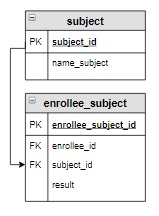

Выведите количество абитуриентов, сдавших ЕГЭ по каждому предмету, максимальное, минимальное и среднее значение баллов по предмету ЕГЭ. Вычисляемые столбцы назвать Количество, Максимум, Минимум, Среднее. Информацию отсортировать по названию предмета в алфавитном порядке, среднее значение округлить до одного знака после запятой.
--not to an end see *по предмету ЕГЭ. *

In [ ]:
#r language to extract this values at one time
#or s.describe() type(s)=='series' or type(s)=='df'

sql=f'''select 
name_subject,
count(enrollee_id) as Количество,
max(result) as Максимум,
min(result) as Минимум,
round(avg(result),1) as Среднее 
from 
enrollee_subject es
left join subject s using (subject_id)
group by name_subject
order by name_subject asc #alphabetically is asc
'''
pandas_execute_sql(sql) #recall case of 3bluebrown 

## 5.names of program subject where minimum intro exam point >=40 [two_tables]

Вывести образовательные программы, для которых минимальный балл ЕГЭ по каждому предмету больше или равен 40 баллам. Программы вывести в отсортированном по алфавиту виде.

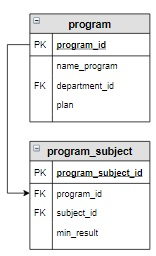

In [ ]:
'''
#thinking in both sides - if inner then only common tables - 
#problem
select 
p.name_program
from 
program p
inner join program_subject ps on ps.program_id = p.program_id and ps.min_result>=40
#where ps.min_result>=40
group by p.name_program;

#check 'using' syntax to understand if on clause help to get needed output
select 
p.name_program
from 
program p
inner join program_subject ps using (program_id)
where ps.min_result>=40
group by p.name_program;

select 
ps.subject_id
from 
program p
left join program_subject ps using (program_id)
where ps.min_result>=40
group by ps.subject_id;


#right way - we now what we need to except
select 
p.name_program,ps.min_result>=40
from 
program p
inner join program_subject ps using (program_id)
;

select 
p.name_program
from 
program p
;
select 
ps.subject_id
from 
program_subject ps
'''

Вывести образовательные программы, которые имеют самый большой план набора,  вместе с этой величиной.

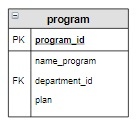

In [ ]:
#create function to define max value and output related title or etc.
#better way is plan = (select max(plan) from)
#

'''select name_program,program 
from program
where plan = 
(select max(q1.sum_plan)
from
(
select sum(plan) as sum_plan,name_program 
from program
group by name_program
)as q1)
;

#wrong way:
#concepts of grouping to combine select and group by by common column names
            select name_program
            from program
            group by name_program
            having max(plan)
;
#problem 
#notice i change column in group by without any shake
#create log  - to see how many values beeing out of general sample
#see images

#tangled solution
              select q1.sum_plan,q1.name_program
              from
              (
              select sum(plan) as sum_plan,name_program 
              from program
              group by name_program
              )as q1
              group by q1.name_program
              having q1.sum_plan not in (select min(q1.sum_plan)
              from
              (
              select sum(plan) as sum_plan,name_program 
              from program
              group by name_program
              )as q1)
              ;

#right way
select min(q1.sum_plan)
from
(
select sum(plan) as sum_plan,name_program 
from program
group by name_program
)as q1
;

#good example if name_program will be duplicated having same names
select sum(plan) as sum_plan,name_program,program_id 
from program
group by name_program,program_id
;
select * from program;

'''

##6.additional points as bonuses [three_tables]

Посчитать, сколько дополнительных баллов получит каждый абитуриент. Столбец с дополнительными баллами назвать Бонус. Информацию вывести в отсортированном по фамилиям виде.

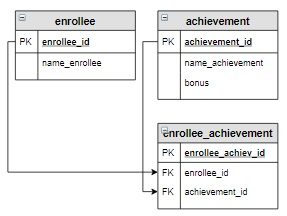

In [ ]:
sql = '''

;

  s enrollee_id,achievement_id,name_enrollee
  f enrollee   
  lj enrollee_achievement using (enrollee_id )

;
  s name_enrollee, ifnull(sum(bonus),0) as Бонус
  f enrollee e
  lj enrollee_achievement ea using(enrollee_id )  
  lj achievement ac using (achievement_id )
  gb name_enrollee
  ob name_enrollee asc
'''
replacer(sql)
#understand that not all students can win achievement
#cascade joining on columns bewtween tables   
#don't work (no common columns): f enrollee elj enrollee_achievement ea using(achievement_id ) 
#enrrolee -> enrrolee_achivement -> achievement
#from enrollee e -> enrollee_id -> achievement_id
#error_log Этот запрос должен отобрать 6 записей -> show expected output-> group by
#error_log Неверное количество столбцов или неверный их порядок, или неверные названия столбцов -> ifnull(sum(bonus),0) as Бонус
#attention code output result but if forget to retype it here then in future output misake
# to output nulls of students achievements -> f enrollee   lj enrollee_achievement using (enrollee_id )
#error_log s enrollee_id,achievement_id,name_enrollee gb name_enrollee -> ERROR 1055: Expression #1 of SELECT list is not in GROUP BY clause and contains nonaggregated column 'stepik_rnB7F5ot.enrollee.enrollee_id' which is not functionally dependent on columns in GROUP BY clause; this is incompatible with sql_mode=only_full_group_by


'\n  select enrollee_id,achievement_id,name_enrollee\n  from enrollee   \n  left join enrollee_achievement using (enrollee_id )\n  group by name_enrollee\n\n;\n  select name_enrollee, ifnull(sum(bonus),0) as Бонус\n  from enrollee e\n  left join enrollee_achievement ea using(enrollee_id )  \n  left join achievement ac using (achievement_id )\n  group by name_enrollee\n  order by name_enrollee asc\n'

## 8.total enrrolee amount and plan by dept and program [three_tables]



Выведите сколько человек подало заявление на каждую образовательную программу и конкурс на нее (число поданных заявлений деленное на количество мест по плану), округленный до 2-х знаков после запятой. В запросе вывести название факультета, к которому относится образовательная программа, название образовательной программы, план набора абитуриентов на образовательную программу (plan), количество поданных заявлений (Количество) и Конкурс. Информацию отсортировать в порядке убывания конкурса.

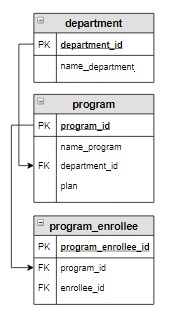

In [ ]:
sql = '''

#s7
#end 11:44
#work as expected but error
#Неверное количество столбцов или неверный их порядок, или неверные названия столбцов
  s 
    dt.name_department, #attention same problem with s order
    p1.name_program, 
    q1.заявок_по_программе as Количество, #attention to s order 
    p1.plan, 
    round(q1.заявок_по_программе/p1.plan,2) as Конкурс
  f 
    program p1
  lj 
    ( s pm.name_program, pm.program_id ,count(ee.enrollee_id) as заявок_по_программе
    f program_enrollee ee
    lj program pm using (program_id)
    gb name_program,program_id) as q1 using (program_id)
  lj 
    department dt using (department_id)
  ob Конкурс desc

;
#сколько заявок у одного студента
#count of student applications
#s6
  s enrollee_id, count(enrollee_id), group_concat( d dt.name_department) 
  f program_enrollee
  lj program pm using (program_id) 
  lj department dt using (department_id) #better to type relations as template
  gb enrollee_id 
  order by count(enrollee_id)
;

#amount of students and sum of limited plan 
#stuck to find sum of plan and count of students in fact of s and gb -> common tables
#s5
  s pm.name_program, count(pe.enrollee_id),count(pm.plan),sum(pm.plan),group_concat(pm.plan) #reson why output is wrong
  f program_enrollee pe
  lj program pm using (program_id)
  gb pm.name_program
;
#s4
#amount of students per program with realtion to program dept
  s pm.name_program, count(ee.enrollee_id)
  f program_enrollee ee
  lj program pm using (program_id)
  lj department dt using (department_id)
  gb pm.name_program
;
#s4
  s pm.department_id,name_department, sum(pm.plan)
  f program pm
  lj department dt using (department_id)
  gb department_id,name_department
#s3
# ;
#   s pm.name_program, sum(pm.plan)
#   f program pm
#   gb name_program

;

#s2
  s pm.name_program, pm.program_id ,count(ee.enrollee_id) as заявок_по_программе
  f program_enrollee ee
  lj program pm using (program_id)
  gb name_program,program_id

;
#s1#
  s program_id, count(enrollee_id), count( d enrollee_id)
  f program_enrollee
  gb program_id 

#hypothesis
#if task description seems unobvious - just lookat the tables in case of mooc courses  
'''
replacer(sql)


'\n\n#s7\n#end 11:44\n#work as expected but error\n#Неверное количество столбцов или неверный их порядок, или неверные названия столбцов\n\n  select \n    p1.name_program, \n    dt.name_department, #attention same problem with select order\n    q1.заявок_по_программе as Количество, #attention to select order \n    p1.plan, \n    round(q1.заявок_по_программе/p1.plan,2) as Конкурс\n  from \n    program p1\n  left join \n    ( select pm.name_program, pm.program_id ,count(ee.enrollee_id) as заявок_по_программе\n    from program_enrollee ee\n    left join program pm using (program_id)\n    group by name_program,program_id) as q1 using (program_id)\n  left join \n    department dt using (department_id)\n  order by Конкурс desc\n\n;\n#сколько заявок у одного студента\n#count of student applications\n#s6\n  select enrollee_id, count(enrollee_id), group_concat( distinct dt.name_department) \n  from program_enrollee\n  left join program pm using (program_id) \n  left join department dt using (de

In [ ]:
sql1=f''' s pm.name_program, pm.program_id ,count(ee.enrollee_id) as заявок_по_программе
    f program_enrollee ee
    lj program pm using (program_id)
    gb name_program,program_id'''


sql2=f'''
  s 
    dt.name_department, #attention same problem with s order
    p1.name_program, 
    p1.plan, 
    q1.заявок_по_программе as Количество, #attention to s order 
  
    round(q1.заявок_по_программе/p1.plan,2) as Конкурс
  f 
    program p1
  lj ({sql1}) as q1 using (program_id)
  lj department dt using (department_id)
  ob Конкурс desc
  '''

len(sql2)-len(replacer(sql2))

-59

In [ ]:
replacer(sql2)

'\n  select \n    dt.name_department, #attention same problem with select order\n    p1.name_program, \n    p1.plan, \n    q1.заявок_по_программе as Количество, #attention to select order \n  \n    round(q1.заявок_по_программе/p1.plan,2) as Конкурс\n  from \n    program p1\n  left join ( select pm.name_program, pm.program_id ,count(ee.enrollee_id) as заявок_по_программе\n    from program_enrollee ee\n    left join program pm using (program_id)\n    group by name_program,program_id) as q1 using (program_id)\n  left join department dt using (department_id)\n  order by Конкурс desc\n  '

## 9.subjects need to pass through educational program [nine_tables]

Вывести образовательные программы, на которые для поступления необходимы предмет «Информатика» и «Математика» в отсортированном по названию программ виде.

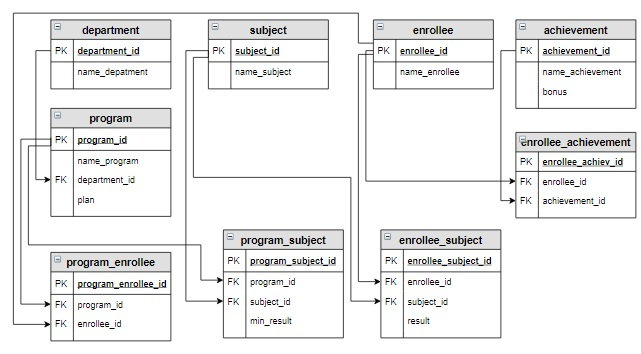https://ucarecdn.com/98c706e5-0118-4fa9-ae09-4a934ece5bc8/

## 10.

Посчитать количество баллов каждого абитуриента на каждую образовательную программу, на которую он подал заявление, по результатам ЕГЭ. В результат включить название образовательной программы, фамилию и имя абитуриента, а также столбец с суммой баллов, который назвать itog. Информацию вывести в отсортированном сначала по образовательной программе, а потом по убыванию суммы баллов виде.

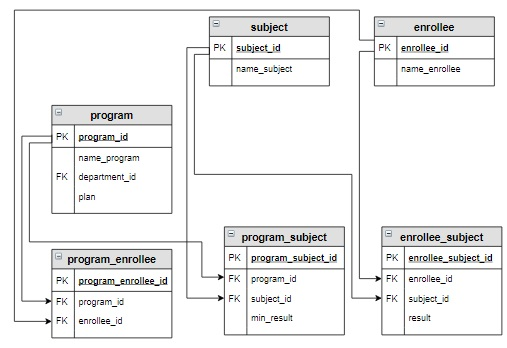

In [ ]:
'Посчитать количество баллов каждого абитуриента на каждую образовательную программу, на которую он подал заявление, по результатам ЕГЭ. В результат включить название образовательной программы, фамилию и имя абитуриента, а также столбец с суммой баллов, который назвать itog. Информацию вывести в отсортированном сначала по образовательной программе, а потом по убыванию суммы баллов виде.'.split('.')


['Посчитать количество баллов каждого абитуриента на каждую образовательную программу, на которую он подал заявление, по результатам ЕГЭ',
 ' В результат включить название образовательной программы, фамилию и имя абитуриента, а также столбец с суммой баллов, который назвать itog',
 ' Информацию вывести в отсортированном сначала по образовательной программе, а потом по убыванию суммы баллов виде',
 '']

In [ ]:
#enrolee 
sql=f'''
  s ee.name_enrollee,ee.enrollee_id, sum(et.result)
  f program_enrollee pe
  lj enrollee ee on ee.enrollee_id = pe.enrollee_id #get enrollee and subj
  lj program pm on pm.program_id  = pe.program_id #get program name
  lj enrollee_subject et on et.enrollee_id = ee.enrollee_id  #get points
  gb ee.name_enrollee,ee.enrollee_id
'''

mysqlreplacer(sql)

In [ ]:
#enrolee 
sql=f'''
  s ee.name_enrollee,ee.enrollee_id,pm.program_id, sum(et.result)
  f program_enrollee pe
  lj enrollee ee on ee.enrollee_id = pe.enrollee_id #get enrollee and subj
  lj program pm on pm.program_id  = pe.program_id #get program name
  lj enrollee_subject et on et.subject_id  = ee.subject_id   #get points
  gb ee.name_enrollee,ee.enrollee_id,pm.program_id
'''
#result val are same for each discipline -> 
mysqlreplacer(sql)

'\n  select ee.name_enrollee,ee.enrollee_id,pm.program_id, sum(et.result)\n  from program_enrollee pe\n  left join enrollee ee on ee.enrollee_id = pe.enrollee_id #get enrollee and subj\n  left join program pm on pm.program_id  = pe.program_id #get program name\n  left join enrollee_subject et on et.subject_id  = ee.subject_id   #get points\n  group by ee.name_enrollee,ee.enrollee_id,pm.program_id\n'

In [ ]:
#enrolee 
sql=f'''
  s ee.name_enrollee,ee.enrollee_id,pm.program_id, sum(et.result)
  f program_enrollee pe
  lj enrollee ee on ee.enrollee_id = pe.enrollee_id #get enrollee and subj
  lj program pm on pm.program_id  = pe.program_id #get program name
  lj subject st on st.subject_id  = ee.subject_id   #get points
  gb ee.name_enrollee,ee.enrollee_id,pm.program_id
'''
#result val are same for each discipline -> 
mysqlreplacer(sql)

In [ ]:
#2022-04-09

sql1=f'''s enrollee_subject_id ,enrollee_id , subject_id , result 
 f enrollee_subject'''
sql2=f''' s program_id,name_program 
f program'''

sql3=f''' s subject_id,name_subject 
  f subject'''
sql4=f''' s program_id , subject_id 
  f program_subject'''

sql5=f'''
  s program_enrollee_id , program_id , enrollee_id 
  f program_enrollee
'''

#12-18 understand that enrrolle and program have two tables
#12-21 need fix \n for every clause
#12-26 stuck to output sum by program id of each enrrolee
sql6=f'''
  s pmst.program_id,eest.enrollee_id,sum(eest.result)
  f ( {sql1} ) as eest 
  lj ( {sql5} ) as pmst 
  on pmst.enrollee_id=eest.enrollee_id
  gb pmst.program_id,eest.enrollee_id 
 '''

#13-12 understand that i need to find distinct result by program and ee
sql7=f'''
  #sql7
  {sql7=}
  s pmst.program_id,eest.enrollee_id,eest.result
  f ( {sql1} ) as eest 
  lj ( {sql5} ) as pmst 
  on pmst.enrollee_id=eest.enrollee_id
 '''

#12-37 still don t understand that g b possible by one column but 
sql8 = f'''
  s q1.enrollee_id ,sum(q1.result) 
  f ({sql7}) as q1 
  gb q1.enrollee_id 
'''
#12-53 waste
sql9=f'''
  s 
  q2.enrollee_id,q2.result 
  f ({sql8}) as q2
  gb q2.enrollee_id 
'''
sql10=f'''

'''

#pros and cons mistakes:
# sql5=f'''
#   s pmst.program_id,eest.enrollee_id,sum(eest.result)
#   f ( {sql1} ) as eest 
#   lj ( {sql4} ) as pmst 
#   on pmst.subject_id=eest.subject_id
#   gb pmst.program_id,eest.enrollee_id
# '''
mysqlreplacer(sql7)

'\n  #\n  select pmst.program_id,eest.enrollee_id,eest.result\n  from ( select enrollee_subject_id ,enrollee_id , subject_id , result \n from enrollee_subject ) as eest \n  left join ( \n  select program_enrollee_id , program_id , enrollee_id \n  from program_enrollee\n ) as pmst \n  on pmst.enrollee_id=eest.enrollee_id\n '

In [ ]:
#2